     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


<ipython-input-1-90f131e1b625>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Passengers'].resample('M').sum()


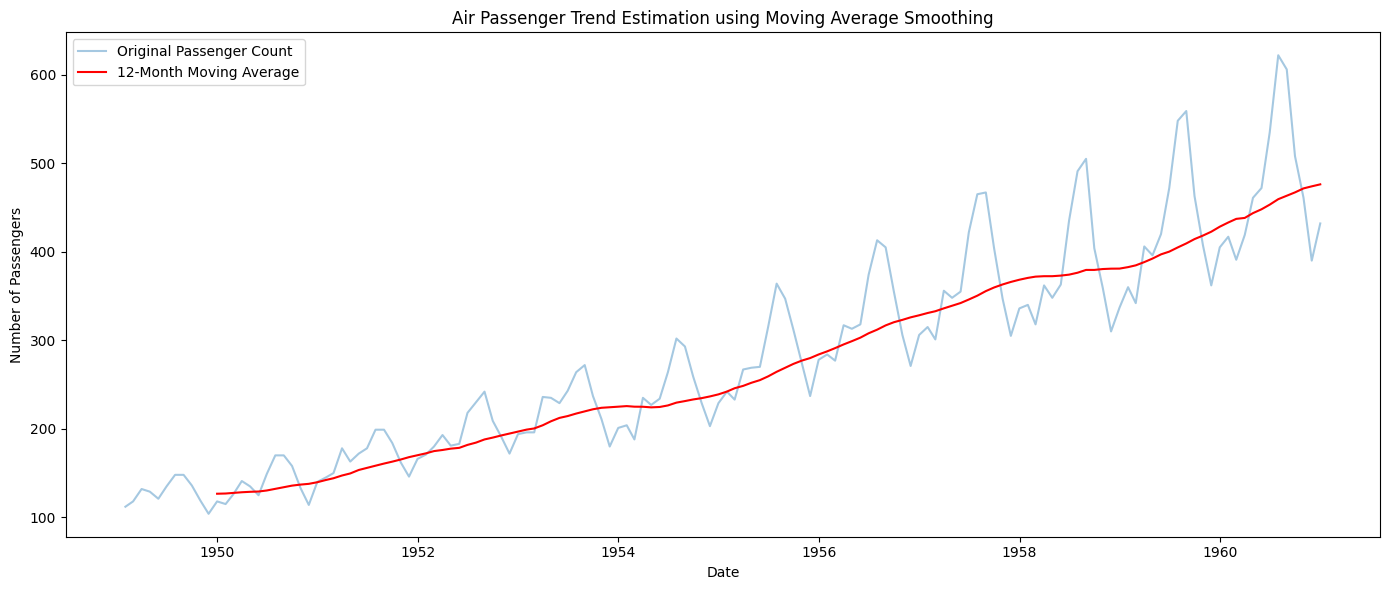

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your AirPassengers dataset
df = pd.read_csv("/content/AirPassengers (1).csv")

# Display the first few rows to confirm column names
print(df.head())

# Convert 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Set 'Month' as the index
df.set_index('Month', inplace=True)

# Rename the passenger column if needed
df.rename(columns={df.columns[0]: 'Passengers'}, inplace=True)

# Resample monthly data (though it's already monthly, just in case)
df_monthly = df['Passengers'].resample('M').sum()

# Apply Moving Average Smoothing (e.g., 12-month window)
window_size = 12
df_smooth = df_monthly.to_frame(name='Passengers')
df_smooth['Moving_Avg'] = df_smooth['Passengers'].rolling(window=window_size).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(14, 6))
plt.plot(df_smooth['Passengers'], label='Original Passenger Count', alpha=0.4)
plt.plot(df_smooth['Moving_Avg'], label=f'{window_size}-Month Moving Average', color='red')
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.title("Air Passenger Trend Estimation using Moving Average Smoothing")
plt.legend()
plt.tight_layout()
plt.show()
